# Pre-procesado de un dataset real con la librería de Pandas
------------------------------------------------------

### Data Science and Machine Learning

#### Febrero 2023

**Aurora Cobo Aguilera**

**The Valley**

------------------------------------------------------


En este notebook se revisarán los pasos para cargar y pre-procesar un dataset a través de un ejemplo. Para ello, se usará **[Python Data Analysis Library](https://pandas.pydata.org/)** (a.k.a. pandas).

Los pasos que se aplican son los siguientes:


*   Eliminar variables que no sean de utilidad
*   Tratar los datos perdidos
*   Crear una etiqueta para la clase binaria
*   Crear los conjuntos de entrenamiento y de test
*   Normalizar las variables de entrada




In [4]:
import pandas as pd # pd es un simple alias
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline  
%config InlineBackend.figure_format = 'retina' # Figuras de alta calidad



El [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) contiene 10 características relacionadas con tumores de pecho que han sido diagnosticados como benignos o malignos. Tienes una descripción de las 10 características en el link de arriba. Ahí puedes descargar el dataset como un archivo csv. 

Nosotros lo importaremos directamente utilizando la siguiente clase.

In [23]:
def load_spam():
    data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',header=None)
    data.columns=['ID', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class']
    return data

Los datos se almacenan en un dataframe, un tipo de datos específico de Pandas.

In [24]:
data = load_spam()

Visualizemos las primeras 10 entradas de los datos con el método `.head()` 

In [25]:
data.head(10)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


Con el método `.shape()` podemos comprobar cuántos datapoints tenemos

In [9]:
print('Hay %d observaciones, cada una de dimension %d' %(data.shape[0], data.shape[1]))

Hay 699 observaciones, cada una de dimension 11


Haremos los siguientes pasos de preprocesado. Todos implementados en Pandas (es aconsejable para datasets grandes):

- Eliminamos la columna 'ID'. No la usaremos más.

- Analizamos los datos perdidos (Codificados en este dataset como '?' por el modo de la columna). 

- La clase es igual a 2 para tumores benignos y 4 para los malignos. Reemplazaremos esto por 0 y 1 respectivamente.

- Creamos conjuntos de entrenamiento y test.

- Normalizaremos todas las variables de entrada para que tengan media cero y varianza unidad.

### Eliminar la columna ID


Podemos usar el método `.drop()`. Usamos la entrada `inplace=True` para sobreescribir el dataframe existente. Axis=1 para columnas.

In [10]:
data.drop('ID', axis=1, inplace=True)

Veamos el resultado

In [ ]:
data.head(10)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


### Sobre datos perdidos

Pandas considera valores como `NaN` y `None` para representar datos perdidos. La función `pandas.isnull` se puede usar para decir si un valor está perdido o no. Usamos np.nan porque así está definido en la librería NumPY.

Usemos `apply()` a lo largo de la columnas en nuestro DataFrame para averiguar qué valores están perdidos. Pero primero cambiemos la codificación que indica dato perdido, `?`, por `NaN`.

In [12]:
data.replace('?', np.nan, inplace=True)

In [13]:
data.isnull()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
694,False,False,False,False,False,False,False,False,False,False
695,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,False


La celda anterior crea un nuevo dataframe con un flag de True o False sobre si el dato está perdido o no y se aplica a toda nuestra matriz del dataframe.

In [14]:
data.isnull().sum()

Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

Observa que sólo una de la columnas tiene 16 datos perdidos. Por simplicidad, eliminemos dicha columna (dependerá de la importancia de los datos). Se consciente que en general imputaremos los valores perdidos con algún valor representativo.

In [15]:
data.drop('Bare Nuclei', axis=1, inplace=True)

In [16]:
#empty = data.apply(lambda col: pd.isnull(col))
#empty.sum()
data.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

### Crear una etiqueta de clase binaria para la columna CLASS

Para ello, crearemos una simple función para convertir la etiqueta y almacenar el resultado en una nueva columna del dataframe.

In [18]:
def convertirABinario(dato):
    return (dato-2.0)/2

**Expresiones Lambda**

Las expresiones `lambda` se usan idealmente cuando necesitamos hacer algo simple y estamos más interesados en hacer el trabajo rápidamente en lugar de nombrar formalmente la función. Las expresiones `lambda` también se conocen como funciones anónimas.

Las expresiones `lambda` en Python son una forma corta de declarar funciones pequeñas y anónimas (no es necesario proporcionar un nombre para las funciones lambda).

Las funciones `lambda` se comportan como funciones normales declaradas con la palabra clave def. Resultan útiles cuando se desea definir una función pequeña de forma concisa. Pueden contener solo una expresión, por lo que no son las más adecuadas para funciones con instrucciones de flujo de control.

https://www.freecodecamp.org/espanol/news/expresiones-lambda-en-python/

In [27]:
data['Binary Class'] = data['Class'].apply(lambda dato: (dato-2.0)/2)

data.drop('Class', axis=1, inplace=True)

KeyError: ignored

Miremos el histograma de la etiqueta de la clase binaria

<AxesSubplot:>

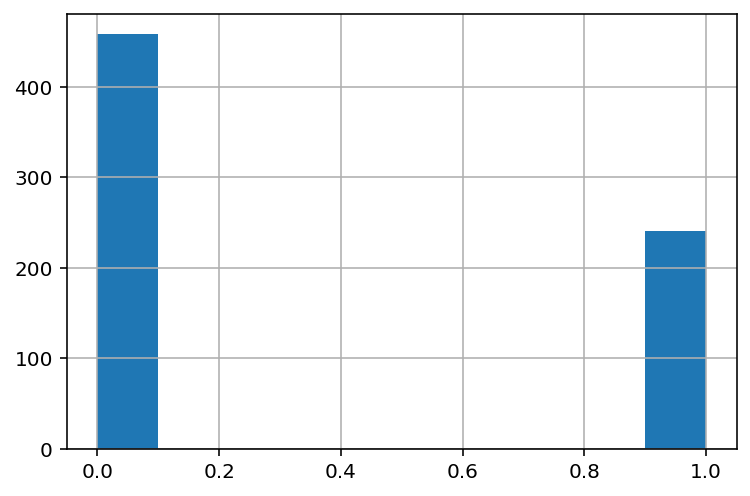

In [28]:
data['Binary Class'].hist()

### Crear conjuntos de datos de entrenamiento y de test

Simplemente dividiremos el dataset aleatoriamente. El 80% de los datos irá para entrenamiento, y el resto para test. Usaremos [la función de permutación aleatoria de Numpy](https://numpy.org/doc/stable/reference/random/generated/numpy.random.permutation.html) y el método `.iloc()` . 

In [29]:
frac_train = 0.8

N_data_train = int(data.shape[0]*frac_train) # Número de datos de entrenamiento

np.random.seed(seed=10) # Para fijar una semilla de aleatoriedad. Todos en todas las ejecuciones haremos la misma partición

mask = np.random.permutation(data.shape[0]) # Ordenación aleatoria de los índices de los datos

train_data = data.iloc[list(mask[:N_data_train])].copy()

test_data = data.iloc[list(mask[N_data_train:])].copy()


Date cuenta de que almacenados los datos de entrenamiento y de test en diferentes Dataframes, así podemos normalizarlos sin modificar los datos originales (Podríamos añadir más columnas al Dataframe original, pero esto luego sería molesto para indexar).



También la partición de entrenamiento y de test se puede hacer facilmente con numpy y la [librería sklearn](https://scikit-learn.org/stable/). Lo verás en el siguiente notebook!

### Normalizar las variables de entrada

En general, no es recomendable que las variables de entrada (o características) se definan en diferentes rangos. I.e., $x_1$ toma valores en el rango $[-1,1]$ y $x_2$ entre $[-10^6,10^6]$. 

Para mejorar tanto la robustez de nuestros estimadores como **mejorar la interpretabilidad**, aplicaremos un paso de preprocesado de normalización lineal para usar las características con media (muestral) 0 y varianza (muestral) igual a 1. 

Dada la matrix de características sin normalizar, $\mathbf{X}_{N\times D}$, calculamos la media muestral por cada columna de las características, $\mu_j$, así como la varianza muestral, $\sigma^2_j$ para $j=1,\ldots,D$. Luego, cada fila de la matriz de características normalizadas $\overline{\mathbf{X}}_{N\times D}$ se obtiene de la siguiente manera:

$$\overline{\mathbf{x}}^{(i)}= \left[\frac{x_1^{(i)}-\mu_1}{\sqrt{\sigma^2_1}}, ~~ \frac{x_2^{(i)}-\mu_2}{\sqrt{\sigma^2_2}}, \ldots, \frac{x_D^{(i)}-\mu_D}{\sqrt{\sigma^2_D}}\right]$$

**Ten en cuenta que esto no afecta a la solución del modelo que luego vayamos a aplicar**, simplemente estamos reescalando el vector de los parámetros $\boldsymbol{w}$ del modelo. Usando esta escala, ahora podemos comparar el efecto de cada variable en la solución del modelo de una manera efectiva: **cuanto más grande sea $|w_j|$, más afectará la característica $j$-th en la estimación de la clase**.

Un aspecto importante es que el conjunto de test se normaliza `**usando las estadísticas del conjunto de entrenamiento (media y varianza)**`

In [32]:
medias = train_data.mean()        #solo datos de entrenamiento
desviaciones = train_data.std()   #solo datos de entrenamiento

<ipython-input-32-ebc44bd7dce1>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  medias = train_data.mean()        #solo datos de entrenamiento
<ipython-input-32-ebc44bd7dce1>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  desviaciones = train_data.std()   #solo datos de entrenamiento


In [33]:
for indice, nombre_columna in enumerate(train_data.columns[:-1]): #excluimos la ultima columna
    print(nombre_columna)
    train_data[nombre_columna] = (train_data[nombre_columna]-medias[indice])/(desviaciones[indice])
    test_data[nombre_columna] = (test_data[nombre_columna]-medias[indice])/(desviaciones[indice])

ID
Clump Thickness
Uniformity of Cell Size
Uniformity of Cell Shape
Marginal Adhesion
Single Epithelial Cell Size
Bare Nuclei


TypeError: ignored

Vamos a mirar el dataframe resultado


In [34]:
train_data.head(10)

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Binary Class
285,-0.811616,1.300525,2.285664,2.276496,2.455409,2.286331,10,10,7,3,1.0
607,-0.983189,-1.212539,-0.700359,-0.747811,-0.642951,-0.552749,1,1,1,1,0.0
587,0.275447,0.223498,-0.700359,-0.747811,-0.642951,-0.552749,1,2,2,1,0.0
458,0.281920,0.223498,-0.700359,-0.411777,-0.642951,-0.552749,1,1,1,1,0.0
431,0.296674,0.223498,-0.700359,-0.747811,0.045573,0.393611,1,3,2,1,0.0
52,0.050972,2.018543,-0.036799,0.932359,-0.298689,-0.079569,5,4,10,2,1.0
560,0.364544,0.223498,-0.700359,-0.747811,-0.642951,-0.552749,1,3,1,1,0.0
445,-0.367156,-0.853530,-0.700359,-0.747811,-0.642951,-0.552749,1,1,1,1,0.0
292,-0.757904,1.300525,1.622103,1.604428,-0.642951,-0.552749,?,6,10,1,1.0
579,-0.372156,-1.212539,-0.700359,-0.747811,-0.642951,-0.552749,1,3,1,1,0.0


Con este dataframe, el dataset estaría listo para entrenar algún modelo de clasificación como una regresión logística.

En el siguiente notebook también explorarás la manera de hacer esta normalización con la librería de Scikit-Learn.

<AxesSubplot:>

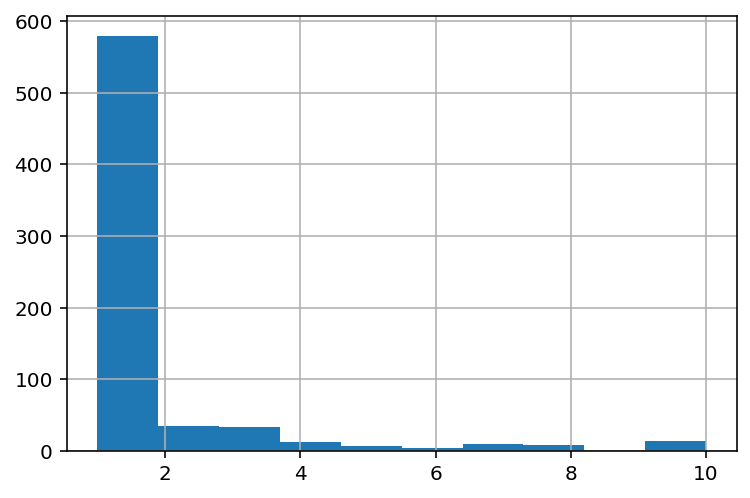

In [37]:
data['Mitoses'].hist()